In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')

In [2]:
df = pd.read_csv('../data/SF_Incident_Reports_2003-2018.csv')
df.head()

,Unnamed: 0,pdid,incidntnum,incident_code,category,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location
0,0,7121491514040,71214915,14040,OTHER OFFENSES,INDECENT EXPOSURE,Tuesday,2007-11-27T00:00:00.000,13:53,NORTHERN,"ARREST, CITED",600 Block of TURK ST,-122.419821,37.782009,"{'type': 'Point', 'coordinates': [-122.4198206..."
1,1,7036663851040,70366638,51040,NON-CRIMINAL,AIDED CASE,Tuesday,2007-03-20T00:00:00.000,23:10,TARAVAL,NONE,2400 Block of 15TH AV,-122.471221,37.742297,"{'type': 'Point', 'coordinates': [-122.4712210..."
2,2,4059322571000,40593225,71000,NON-CRIMINAL,LOST PROPERTY,Thursday,2004-05-20T00:00:00.000,12:00,TARAVAL,NONE,19TH AV / WAWONA ST,-122.475288,37.737453,"{'type': 'Point', 'coordinates': [-122.4752878..."
3,3,3085157264070,30851572,64070,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Thursday,2003-07-17T00:00:00.000,17:35,INGLESIDE,PROSECUTED BY OUTSIDE AGENCY,100 Block of 29TH ST,-122.423538,37.743834,"{'type': 'Point', 'coordinates': [-122.4235383..."
4,4,13067727606304,130677276,6304,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Thursday,2013-08-15T00:00:00.000,04:42,SOUTHERN,NONE,200 Block of KANSAS ST,-122.403631,37.766658,"{'type': 'Point', 'coordinates': [-122.4036311..."


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,pdid,incidntnum,incident_code,category,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location
0,7121491514040,71214915,14040,OTHER OFFENSES,INDECENT EXPOSURE,Tuesday,2007-11-27T00:00:00.000,13:53,NORTHERN,"ARREST, CITED",600 Block of TURK ST,-122.419821,37.782009,"{'type': 'Point', 'coordinates': [-122.4198206..."
1,7036663851040,70366638,51040,NON-CRIMINAL,AIDED CASE,Tuesday,2007-03-20T00:00:00.000,23:10,TARAVAL,NONE,2400 Block of 15TH AV,-122.471221,37.742297,"{'type': 'Point', 'coordinates': [-122.4712210..."
2,4059322571000,40593225,71000,NON-CRIMINAL,LOST PROPERTY,Thursday,2004-05-20T00:00:00.000,12:00,TARAVAL,NONE,19TH AV / WAWONA ST,-122.475288,37.737453,"{'type': 'Point', 'coordinates': [-122.4752878..."
3,3085157264070,30851572,64070,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Thursday,2003-07-17T00:00:00.000,17:35,INGLESIDE,PROSECUTED BY OUTSIDE AGENCY,100 Block of 29TH ST,-122.423538,37.743834,"{'type': 'Point', 'coordinates': [-122.4235383..."
4,13067727606304,130677276,6304,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Thursday,2013-08-15T00:00:00.000,04:42,SOUTHERN,NONE,200 Block of KANSAS ST,-122.403631,37.766658,"{'type': 'Point', 'coordinates': [-122.4036311..."


In [4]:
df.drop_duplicates(inplace=True)
df.shape

(1625789, 14)

In [5]:
df.isnull().sum()

pdid             0
incidntnum       0
incident_code    0
category         0
descript         0
dayofweek        0
date             0
time             0
pddistrict       1
resolution       0
address          0
x                0
y                0
location         0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.shape

(1625788, 14)

In [7]:
df['date'] = df['date'].astype(str)
df.sort_values(by='date', inplace=True)
dates_df = df['date'].str.split(pat='-', expand=True)
dates_df.columns = ['Year', 'Month', 'Day']
dates_df

,Year,Month,Day
2094127,2003,01,01T00:00:00.000
1989927,2003,01,01T00:00:00.000
640998,2003,01,01T00:00:00.000
301622,2003,01,01T00:00:00.000
1473396,2003,01,01T00:00:00.000
...,...,...,...
2079813,2018,05,15T00:00:00.000
2114547,2018,05,15T00:00:00.000
1730964,2018,05,15T00:00:00.000
1501099,2018,05,15T00:00:00.000


In [8]:
frames = [df, dates_df]
df = pd.concat(frames, axis=1)
df

,pdid,incidntnum,incident_code,category,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location,Year,Month,Day
2094127,3005373406112,30053734,6112,LARCENY/THEFT,GRAND THEFT PICKPOCKET,Wednesday,2003-01-01T00:00:00.000,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"{'type': 'Point', 'coordinates': [-122.4034047...",2003,01,01T00:00:00.000
1989927,3000143205051,30001432,5051,BURGLARY,"BURGLARY OF STORE, FORCIBLE ENTRY",Wednesday,2003-01-01T00:00:00.000,07:00,MISSION,NONE,2700 Block of 24TH ST,-122.407735,37.752825,"{'type': 'Point', 'coordinates': [-122.4077348...",2003,01,01T00:00:00.000
640998,6027565709110,60275657,9110,FRAUD,"FORGERY, CREDIT CARD",Wednesday,2003-01-01T00:00:00.000,12:00,SOUTHERN,NOT PROSECUTED,800 Block of BRYANT ST,-122.403405,37.775421,"{'type': 'Point', 'coordinates': [-122.4034047...",2003,01,01T00:00:00.000
301622,3000122215040,30001222,15040,ASSAULT,INFLICT INJURY ON COHABITEE,Wednesday,2003-01-01T00:00:00.000,02:00,SOUTHERN,NONE,4TH ST / TOWNSEND ST,-122.394986,37.777091,"{'type': 'Point', 'coordinates': [-122.3949858...",2003,01,01T00:00:00.000
1473396,3000911306302,30009113,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Wednesday,2003-01-01T00:00:00.000,01:30,CENTRAL,NONE,THE EMBARCADERO NORTH ST / BAY ST,-122.402039,37.804257,"{'type': 'Point', 'coordinates': [-122.4020389...",2003,01,01T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079813,18036087965010,180360879,65010,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,2018-05-15T00:00:00.000,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'type': 'Point', 'coordinates': [-122.4178125...",2018,05,15T00:00:00.000
2114547,18036087926150,180360879,26150,OTHER OFFENSES,PAROLE VIOLATION,Tuesday,2018-05-15T00:00:00.000,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'type': 'Point', 'coordinates': [-122.4178125...",2018,05,15T00:00:00.000
1730964,18036079462050,180360794,62050,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,2018-05-15T00:00:00.000,00:19,PARK,"ARREST, BOOKED",1500 Block of HAIGHT ST,-122.447761,37.769846,"{'type': 'Point', 'coordinates': [-122.4477611...",2018,05,15T00:00:00.000
1501099,18036228907023,180362289,7023,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,2018-05-15T00:00:00.000,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.411912,37.775207,"{'type': 'Point', 'coordinates': [-122.4119120...",2018,05,15T00:00:00.000


In [9]:
df = df[df['Year'] != '2018']
df

,pdid,incidntnum,incident_code,category,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location,Year,Month,Day
2094127,3005373406112,30053734,6112,LARCENY/THEFT,GRAND THEFT PICKPOCKET,Wednesday,2003-01-01T00:00:00.000,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"{'type': 'Point', 'coordinates': [-122.4034047...",2003,01,01T00:00:00.000
1989927,3000143205051,30001432,5051,BURGLARY,"BURGLARY OF STORE, FORCIBLE ENTRY",Wednesday,2003-01-01T00:00:00.000,07:00,MISSION,NONE,2700 Block of 24TH ST,-122.407735,37.752825,"{'type': 'Point', 'coordinates': [-122.4077348...",2003,01,01T00:00:00.000
640998,6027565709110,60275657,9110,FRAUD,"FORGERY, CREDIT CARD",Wednesday,2003-01-01T00:00:00.000,12:00,SOUTHERN,NOT PROSECUTED,800 Block of BRYANT ST,-122.403405,37.775421,"{'type': 'Point', 'coordinates': [-122.4034047...",2003,01,01T00:00:00.000
301622,3000122215040,30001222,15040,ASSAULT,INFLICT INJURY ON COHABITEE,Wednesday,2003-01-01T00:00:00.000,02:00,SOUTHERN,NONE,4TH ST / TOWNSEND ST,-122.394986,37.777091,"{'type': 'Point', 'coordinates': [-122.3949858...",2003,01,01T00:00:00.000
1473396,3000911306302,30009113,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Wednesday,2003-01-01T00:00:00.000,01:30,CENTRAL,NONE,THE EMBARCADERO NORTH ST / BAY ST,-122.402039,37.804257,"{'type': 'Point', 'coordinates': [-122.4020389...",2003,01,01T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789183,18000316028150,180003160,28150,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,2017-12-31T00:00:00.000,16:00,MISSION,NONE,0 Block of COLLINGWOOD ST,-122.436108,37.761471,"{'type': 'Point', 'coordinates': [-122.4361075...",2017,12,31T00:00:00.000
1498932,18600618871000,186006188,71000,NON-CRIMINAL,LOST PROPERTY,Sunday,2017-12-31T00:00:00.000,17:00,SOUTHERN,NONE,400 Block of SPEAR ST,-122.388888,37.788328,"{'type': 'Point', 'coordinates': [-122.3888884...",2017,12,31T00:00:00.000
1501475,18600022106244,186000221,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2017-12-31T00:00:00.000,22:30,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"{'type': 'Point', 'coordinates': [-122.4034047...",2017,12,31T00:00:00.000
2114917,18600091406372,186000914,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,2017-12-31T00:00:00.000,23:28,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"{'type': 'Point', 'coordinates': [-122.4034047...",2017,12,31T00:00:00.000


In [10]:
df.to_csv('SF_Incident_Reports_2003-2017_cleaned.csv')

In [11]:
df['category'].value_counts()

LARCENY/THEFT                  348816
OTHER OFFENSES                 224403
NON-CRIMINAL                   174038
ASSAULT                        140361
VEHICLE THEFT                   94197
DRUG/NARCOTIC                   88022
VANDALISM                       84226
WARRANTS                        74025
BURGLARY                        66957
SUSPICIOUS OCC                  58695
ROBBERY                         40476
MISSING PERSON                  32203
FRAUD                           30435
FORGERY/COUNTERFEITING          17245
SECONDARY CODES                 16532
WEAPON LAWS                     15392
TRESPASS                        14026
PROSTITUTION                    12461
STOLEN PROPERTY                  8462
SEX OFFENSES, FORCIBLE           7921
DISORDERLY CONDUCT               7395
DRUNKENNESS                      7380
RECOVERED VEHICLE                6578
DRIVING UNDER THE INFLUENCE      4215
KIDNAPPING                       3667
LIQUOR LAWS                      2985
ARSON       

In [12]:
df_yearly_sums = df.groupby('Year')[['category']].agg('count')
df_yearly_sums

,category
Year,
2003,110575
2004,110016
2005,106006
2006,102276
2007,102131
2008,104913
2009,103849
2010,99035
2011,97953


In [13]:
df_2003 = df[df['Year'] == '2003']
df_2003.shape

(110575, 17)

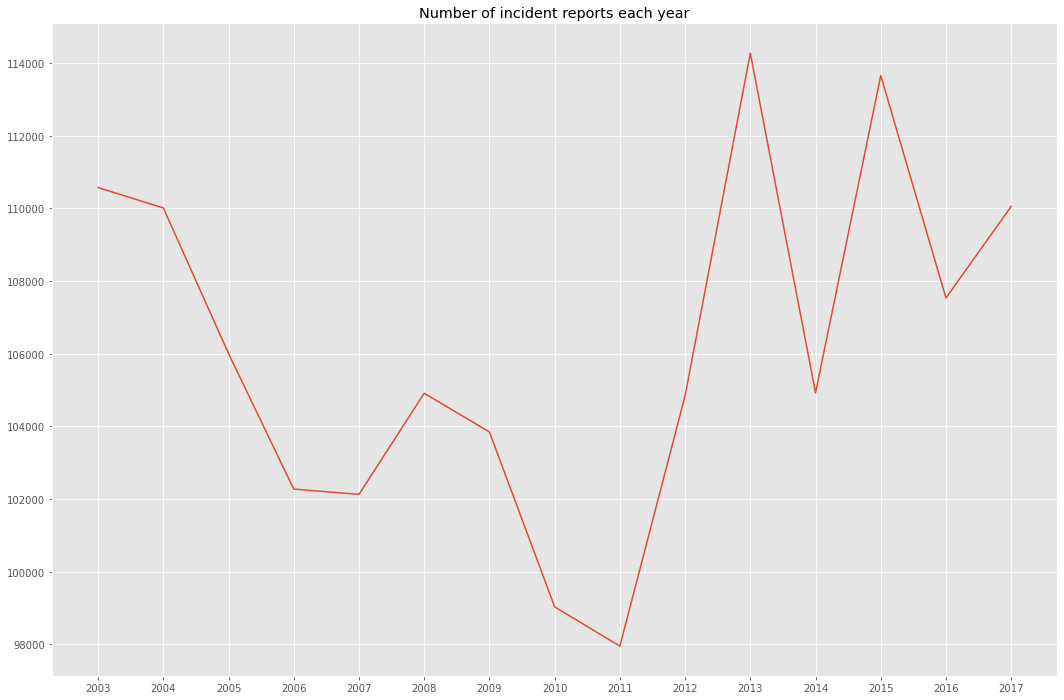

In [14]:
plt.figure(figsize=(18,12))
plt.title('Number of incident reports each year')
plt.plot(df_yearly_sums.index, df_yearly_sums['category'])
plt.show()

There must be a drop in 2018 data because the rest of the data is concatenated to the dataset from 2018 to present day. So this row is not accurate to judge

In [15]:
# df_yearly_sums.drop(['2018'],axis=0 ,inplace=True)

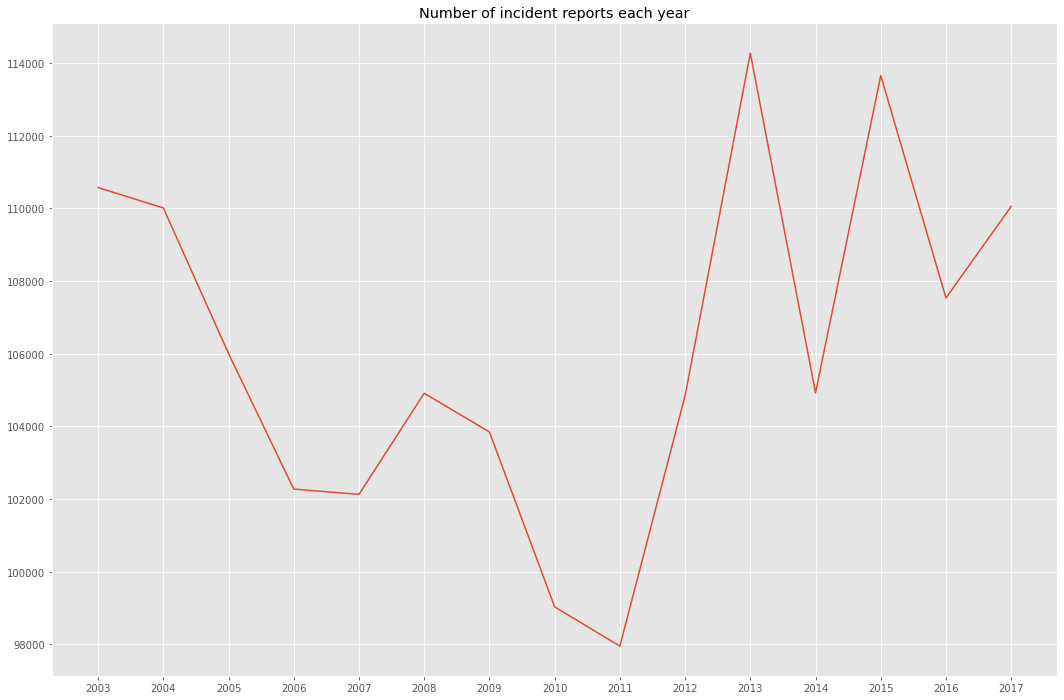

In [16]:
plt.figure(figsize=(18,12))
plt.title('Number of incident reports each year')
plt.plot(df_yearly_sums.index, df_yearly_sums['category'])
plt.show()

In [17]:
df_2011 = df[df['Year'] == '2011']

In [18]:
df_2011

,pdid,incidntnum,incident_code,category,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location,Year,Month,Day
1990263,12000379472000,120003794,72000,NON-CRIMINAL,FOUND PROPERTY,Saturday,2011-01-01T00:00:00.000,11:00,SOUTHERN,NONE,JONES ST / MARKET ST,-122.411979,37.780904,"{'type': 'Point', 'coordinates': [-122.4119794...",2011,01,01T00:00:00.000
695776,11601320006374,116013200,6374,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Saturday,2011-01-01T00:00:00.000,00:15,SOUTHERN,NONE,MARKET ST / THE EMBARCADEROSOUTH ST,-122.393984,37.795061,"{'type': 'Point', 'coordinates': [-122.3939836...",2011,01,01T00:00:00.000
1465302,13104231968020,131042319,68020,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Saturday,2011-01-01T00:00:00.000,12:00,TARAVAL,NONE,100 Block of THRIFT ST,-122.457612,37.717521,"{'type': 'Point', 'coordinates': [-122.4576124...",2011,01,01T00:00:00.000
509207,11002035051040,110020350,51040,NON-CRIMINAL,AIDED CASE,Saturday,2011-01-01T00:00:00.000,12:00,RICHMOND,LOCATED,400 Block of 24TH AV,-122.483801,37.781088,"{'type': 'Point', 'coordinates': [-122.4838005...",2011,01,01T00:00:00.000
57016,11080579864070,110805798,64070,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Saturday,2011-01-01T00:00:00.000,00:01,CENTRAL,EXCEPTIONAL CLEARANCE,1100 Block of HYDE ST,-122.417420,37.791466,"{'type': 'Point', 'coordinates': [-122.4174202...",2011,01,01T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899290,13063021809027,130630218,9027,OTHER OFFENSES,FALSE PERSONATION,Saturday,2011-12-31T00:00:00.000,00:01,TENDERLOIN,UNFOUNDED,400 Block of ELLIS ST,-122.413631,37.784805,"{'type': 'Point', 'coordinates': [-122.4136312...",2011,12,31T00:00:00.000
163981,12000945715200,120009457,15200,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,2011-12-31T00:00:00.000,11:30,NORTHERN,"ARREST, BOOKED",700 Block of WEBSTER ST,-122.429919,37.777443,"{'type': 'Point', 'coordinates': [-122.4299186...",2011,12,31T00:00:00.000
1903936,12000163506304,120001635,6304,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Saturday,2011-12-31T00:00:00.000,23:30,CENTRAL,NONE,500 Block of GEARY ST,-122.412777,37.786834,"{'type': 'Point', 'coordinates': [-122.4127772...",2011,12,31T00:00:00.000
1873792,12000869707021,120008697,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Saturday,2011-12-31T00:00:00.000,21:00,RICHMOND,NONE,FULTON ST / 48TH AV,-122.508822,37.771443,"{'type': 'Point', 'coordinates': [-122.5088215...",2011,12,31T00:00:00.000


In [19]:
df_2011['dayofweek'].value_counts()

Saturday     15269
Friday       15169
Wednesday    14452
Thursday     13863
Tuesday      13462
Sunday       12990
Monday       12748
Name: dayofweek, dtype: int64

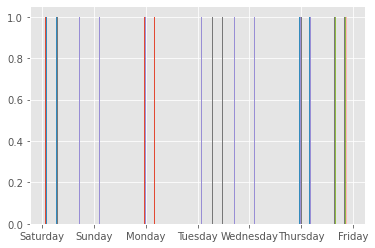

In [20]:
plt.hist(df_2011['dayofweek'])
plt.show()

In [21]:
df_2011['descript'].value_counts()

GRAND THEFT FROM LOCKED AUTO                                   6565
LOST PROPERTY                                                  3760
DRIVERS LICENSE, SUSPENDED OR REVOKED                          3039
AIDED CASE, MENTAL DISTURBED                                   2909
BATTERY                                                        2807
                                                               ... 
THROWING INJURIOUS SUBSTANCE ON HIGHWAY                           1
DAMAGE TO FIRE ALARM APPARATUS                                    1
DISCHARGING OFFENSIVE OR INJURIOUS SUBSTANCE IN PUBLIC AREA       1
VEHICLE, RECOVERED, OTHER VEHICLE                                 1
PUTTING SLUGS IN COIN OPERATED MACHINES                           1
Name: descript, Length: 684, dtype: int64

In [23]:
# budget data
df_budget = pd.read_csv('../data/Spending_Revenue_cleaned.csv')
df_budget.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df_budget.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
0,1999,Revenue,No,Public Protection,CRT Superior Court,Trial Court Services,Charges For Services,General Government Services,Court Fees,General Fund,Operating,525632.62
1,1999,Spending,No,Public Protection,PDR Public Defender,Criminal And Special Defense,Non Personnel Services,Training,Training Costs Paid To Emplye,General Fund,Operating,425.83
2,1999,Spending,No,"Public Works, Transportation & Commerce",WTR Water Enterprise,Water Facilities Maintenance Projects,Salaries,Permanent Salaries-Misc,Misc-Other Timeoff,Water Operating Fund,Continuing Projects,17433.51
3,1999,Spending,No,General Administration & Finance,ADM Gen Svcs Agency-City Admin,Ag Wts & Measures Inspection,Non Personnel Services,Employee Expenses,Local Field Exp,General Fund,Work Orders/Overhead,24.00
4,1999,Spending,No,"Public Works, Transportation & Commerce",DPW GSA - Public Works,Engineering,Mandatory Fringe Benefits,Unemployment Insurance,Unemployment Insurance,General Fund,Continuing Projects,380.15


In [24]:
# incident reports
df.head()

,pdid,incidntnum,incident_code,category,descript,dayofweek,date,time,pddistrict,resolution,address,x,y,location,Year,Month,Day
2094127,3005373406112,30053734,6112,LARCENY/THEFT,GRAND THEFT PICKPOCKET,Wednesday,2003-01-01T00:00:00.000,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"{'type': 'Point', 'coordinates': [-122.4034047...",2003,01,01T00:00:00.000
1989927,3000143205051,30001432,5051,BURGLARY,"BURGLARY OF STORE, FORCIBLE ENTRY",Wednesday,2003-01-01T00:00:00.000,07:00,MISSION,NONE,2700 Block of 24TH ST,-122.407735,37.752825,"{'type': 'Point', 'coordinates': [-122.4077348...",2003,01,01T00:00:00.000
640998,6027565709110,60275657,9110,FRAUD,"FORGERY, CREDIT CARD",Wednesday,2003-01-01T00:00:00.000,12:00,SOUTHERN,NOT PROSECUTED,800 Block of BRYANT ST,-122.403405,37.775421,"{'type': 'Point', 'coordinates': [-122.4034047...",2003,01,01T00:00:00.000
301622,3000122215040,30001222,15040,ASSAULT,INFLICT INJURY ON COHABITEE,Wednesday,2003-01-01T00:00:00.000,02:00,SOUTHERN,NONE,4TH ST / TOWNSEND ST,-122.394986,37.777091,"{'type': 'Point', 'coordinates': [-122.3949858...",2003,01,01T00:00:00.000
1473396,3000911306302,30009113,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Wednesday,2003-01-01T00:00:00.000,01:30,CENTRAL,NONE,THE EMBARCADERO NORTH ST / BAY ST,-122.402039,37.804257,"{'type': 'Point', 'coordinates': [-122.4020389...",2003,01,01T00:00:00.000
